In [1]:
from skimage.filters import median
from skimage.filters import gaussian
from scipy.ndimage import convolve
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

### **Removiendo ruido gaussiano aditivo**

Podemos pensar que la imagen que observamos tiene un componente de "señal" pura y un error que puede ser modelado como una variable aleatoria que sigue una distribución normal: $I_{x,y} + \mathcal{N}(\mu=0, \sigma)$

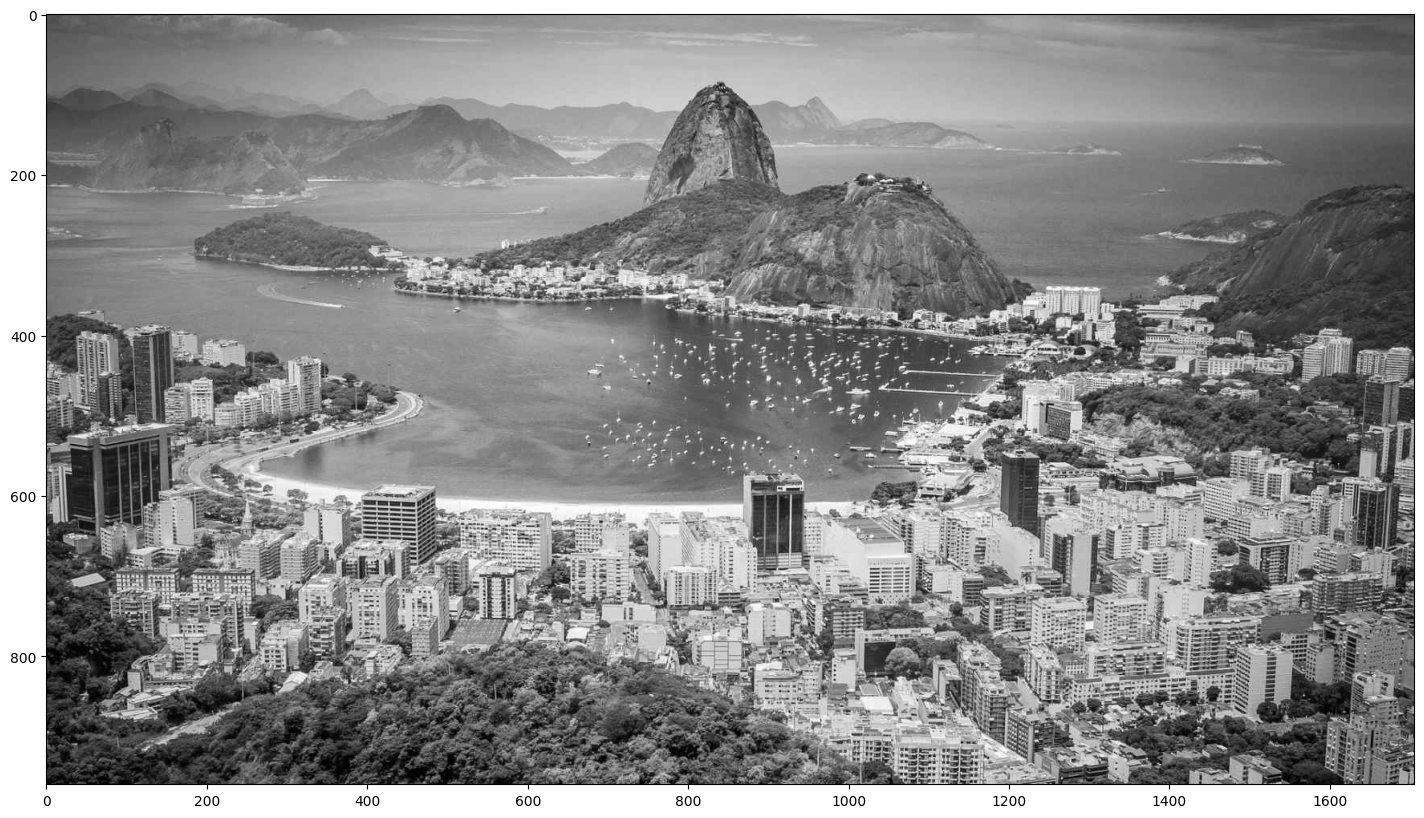

In [2]:
plt.figure(figsize=(20,10))
im = imread('https://s5.eestatic.com/2019/11/29/viajes/Viajes-Rio_de_Janeiro-Brasil-Viajes_448217139_139252114_1706x960.jpg', as_gray=True)
plt.imshow(im, cmap='gray')

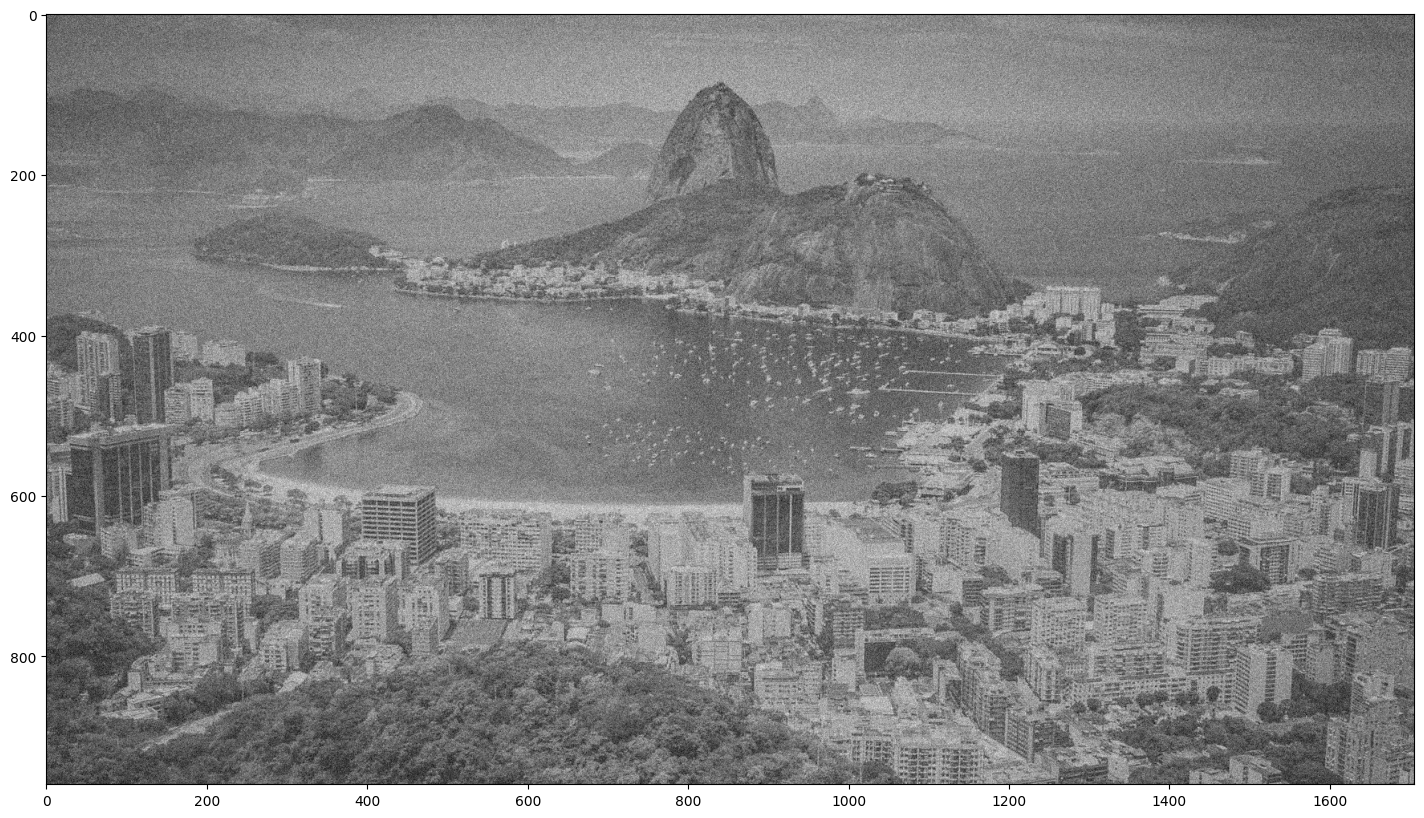

In [3]:
#@title Añadiendo ruido gaussiano aditivo { run: "auto" }
sigma = 0.13 #@param {type:"slider", min:0, max:2, step:0.01}
plt.figure(figsize=(20,10))
im = imread('https://s5.eestatic.com/2019/11/29/viajes/Viajes-Rio_de_Janeiro-Brasil-Viajes_448217139_139252114_1706x960.jpg', as_gray=True)
im += np.random.randn(*im.shape)*sigma
plt.imshow(im, cmap='gray')

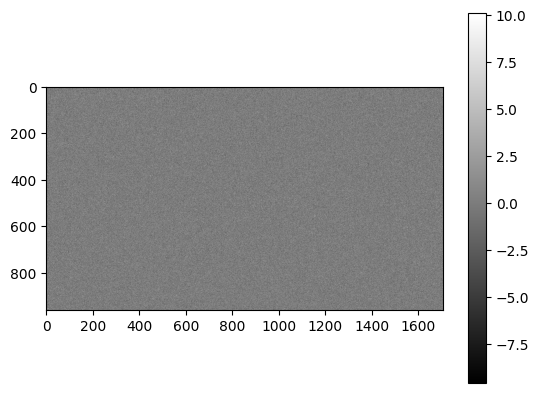

In [4]:
plt.imshow(np.random.randn(*im.shape)*2, cmap='gray')
plt.colorbar()

**Preguntas**

*   ¿Qué niveles de $\sigma$ permiten aun identificar la imagen?


Usando el filtro de la media

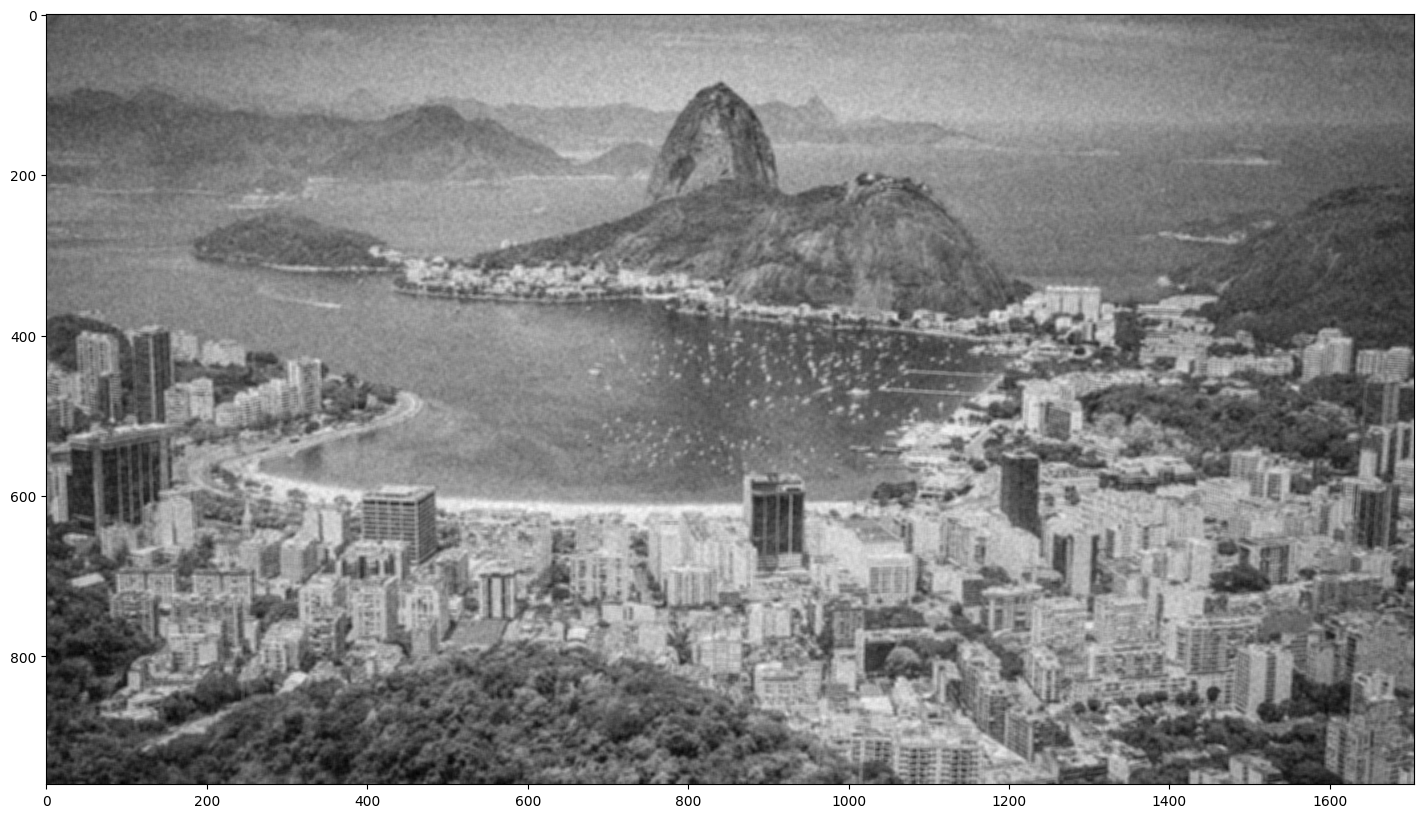

La imagen es de tamaño: 960x1706


In [5]:
#@title Filtro de la media { run: "auto" }
n = 5 #@param {type:"slider", min:3, max:15, step:2}
mode = "mirror" #@param ['reflect','constant','nearest','mirror', 'wrap']
plt.figure(figsize=(20,10))
kernel = np.ones((n,n))/(n*n)
im_mean_filtered = convolve(im, kernel, mode=mode)
plt.imshow(im_mean_filtered, cmap='gray')
plt.show()
print("La imagen es de tamaño: {}x{}".format(*im_mean_filtered.shape))

**Preguntas**

*   ¿Qué valores de $n$ permiten recuperar la imagen original de manera más efectiva cuando el ruido aditivo tiene $\sigma$=0.2?
*   ¿Y cuando $\sigma$=0.45?


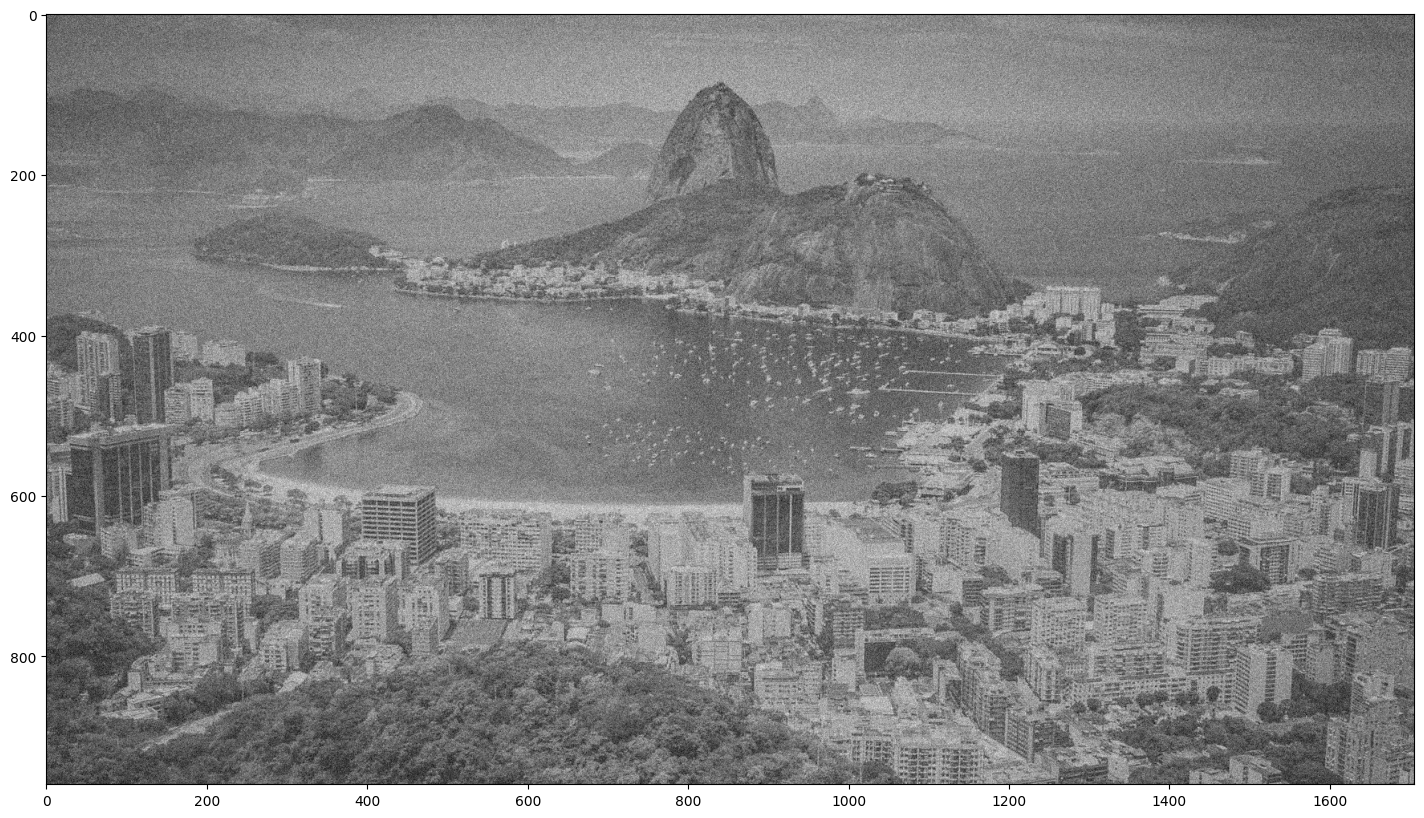

In [6]:
#@title Filtro gaussiano { run: "auto" }
sigma = 0.1 #@param {type:"slider", min:0, max:10, step:0.1}
plt.figure(figsize=(20,10))
im_gaussian_filtered = gaussian(im, sigma)
plt.imshow(im_gaussian_filtered, cmap='gray')

**Preguntas**

*   ¿Qué valores de $\sigma$ del filtro gaussiano permiten recuperar la imagen original de manera más efectiva cuando el ruido aditivo tiene $\sigma$=0.2?
*   ¿Y cuando $\sigma$=0.45?

... y finalmente observemos el resultado de aplicar el filtro de la mediana

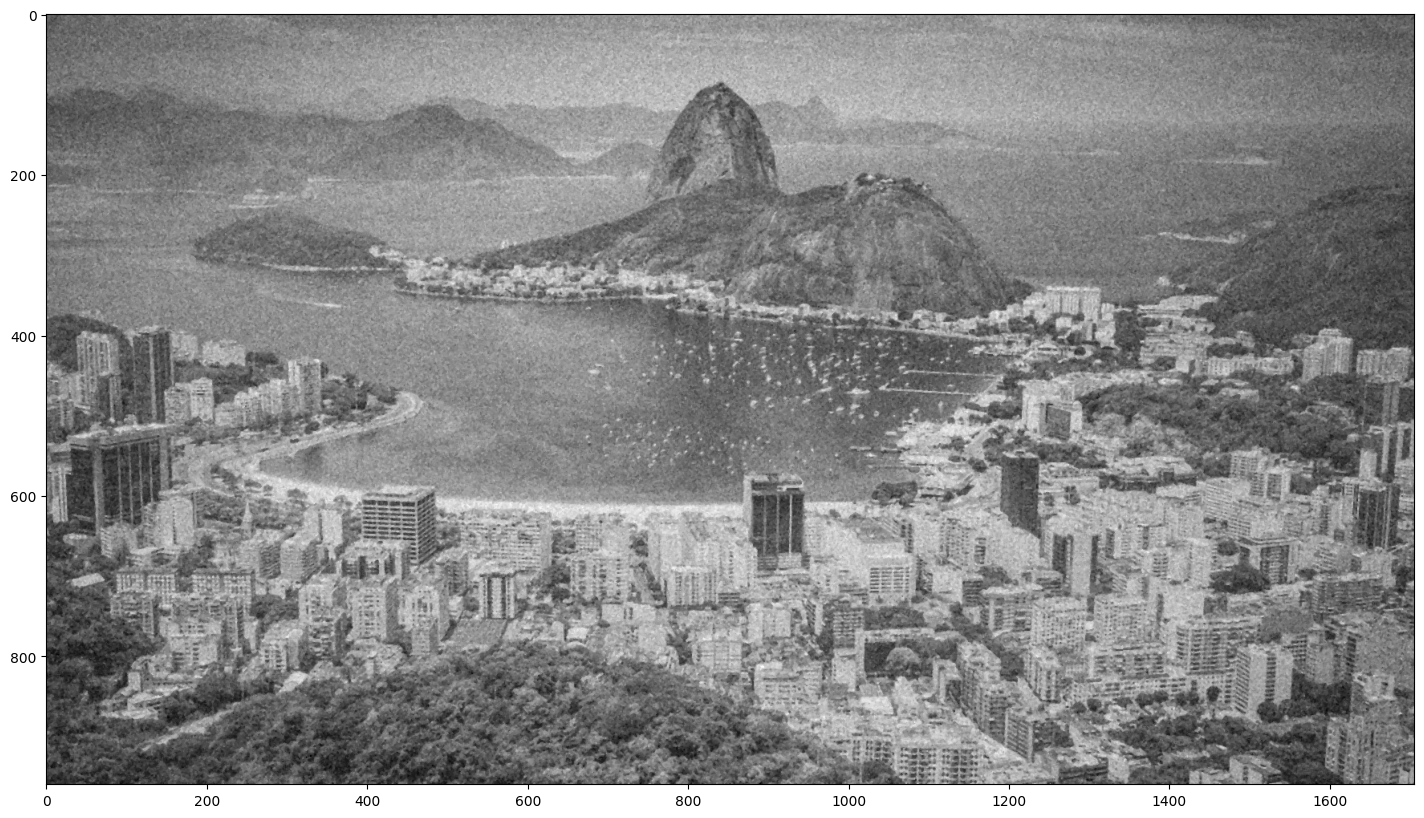

In [7]:
plt.figure(figsize=(20,10))
im_median_filtered = median(im)
plt.imshow(im_median_filtered, cmap='gray')

### **Removiendo ruido impulsivo**

Primero, vamos a cargar una imagen que haya sufrido distorción en la forma de ruido impulsivo (o salt-and-pepper)

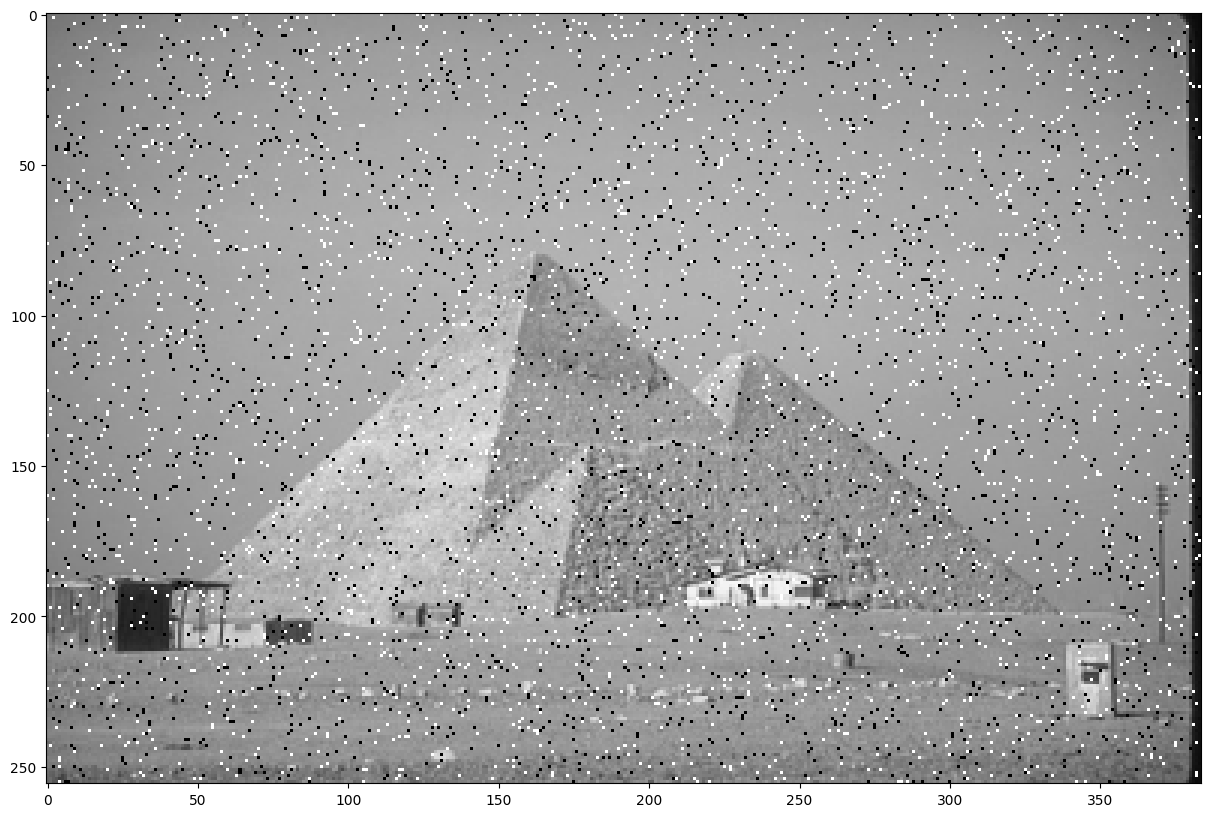

In [8]:
# La imagen a continuación tiene ruido 'salt-and-pepper'
# 5% salt-and-pepper noise, 161062.png, PSNR: 18.71 dB
plt.figure(figsize=(20,10))
im = imread('http://www.fit.vutbr.cz/~vasicek/imagedb/img_corrupted/impnoise_005/161062.png')
plt.imshow(im, cmap='gray')

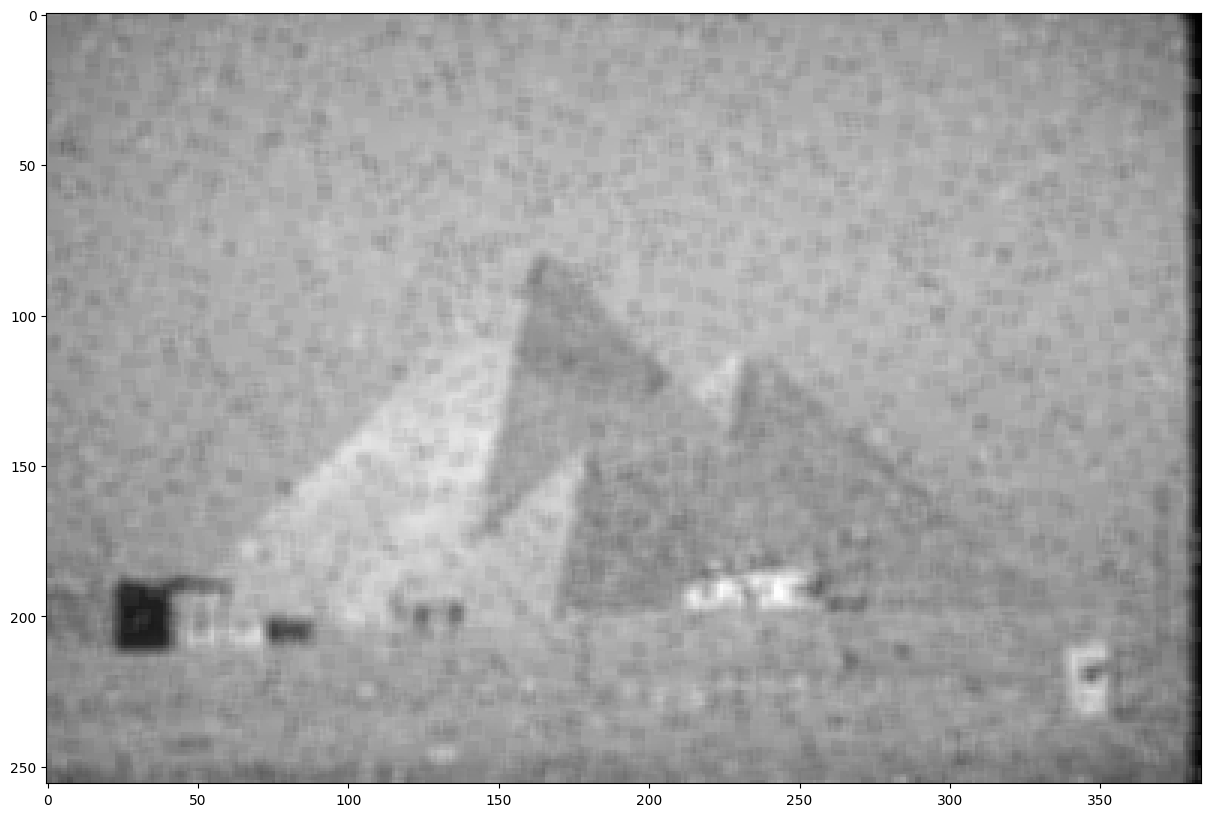

La imagen es de tamaño: 256x384


In [9]:
#@title Filtro de la media { run: "auto" }
n = 5 #@param {type:"slider", min:3, max:15, step:2}
mode = "reflect" #@param ['reflect','constant','nearest','mirror', 'wrap']
plt.figure(figsize=(20,10))
kernel = np.ones((n,n))/(n*n)
im_mean_filtered = convolve(im, kernel, mode=mode)
plt.imshow(im_mean_filtered, cmap='gray')
plt.show()
print("La imagen es de tamaño: {}x{}".format(*im_mean_filtered.shape))

**Preguntas**

*   ¿Qué valores de $n$ mantienen los detalles de la imagen?  
*   ¿Qué valores de $n$ eliminan el ruido?

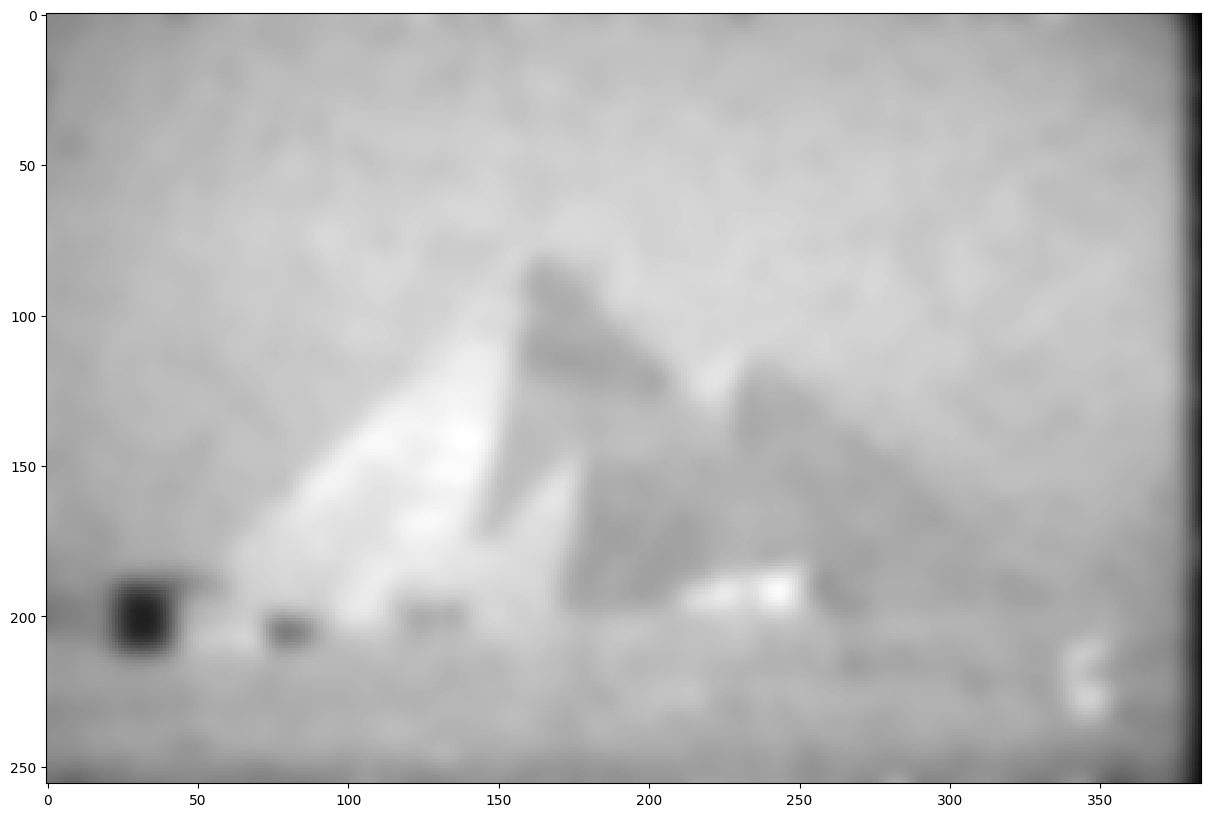

In [10]:
#@title Filtro gaussiano { run: "auto" }
sigma = 4.1 #@param {type:"slider", min:0, max:10, step:0.1}
plt.figure(figsize=(20,10))
im_gaussian_filtered = gaussian(im, sigma)
plt.imshow(im_gaussian_filtered, cmap='gray')

**Preguntas**

*   ¿Qué valores de $\sigma$ mantienen los detalles de la imagen?  
*   ¿Qué valores de $\sigma$ eliminan el ruido?



Veamos qué ocurre, al aplicar el filtro no-lineal de la mediana

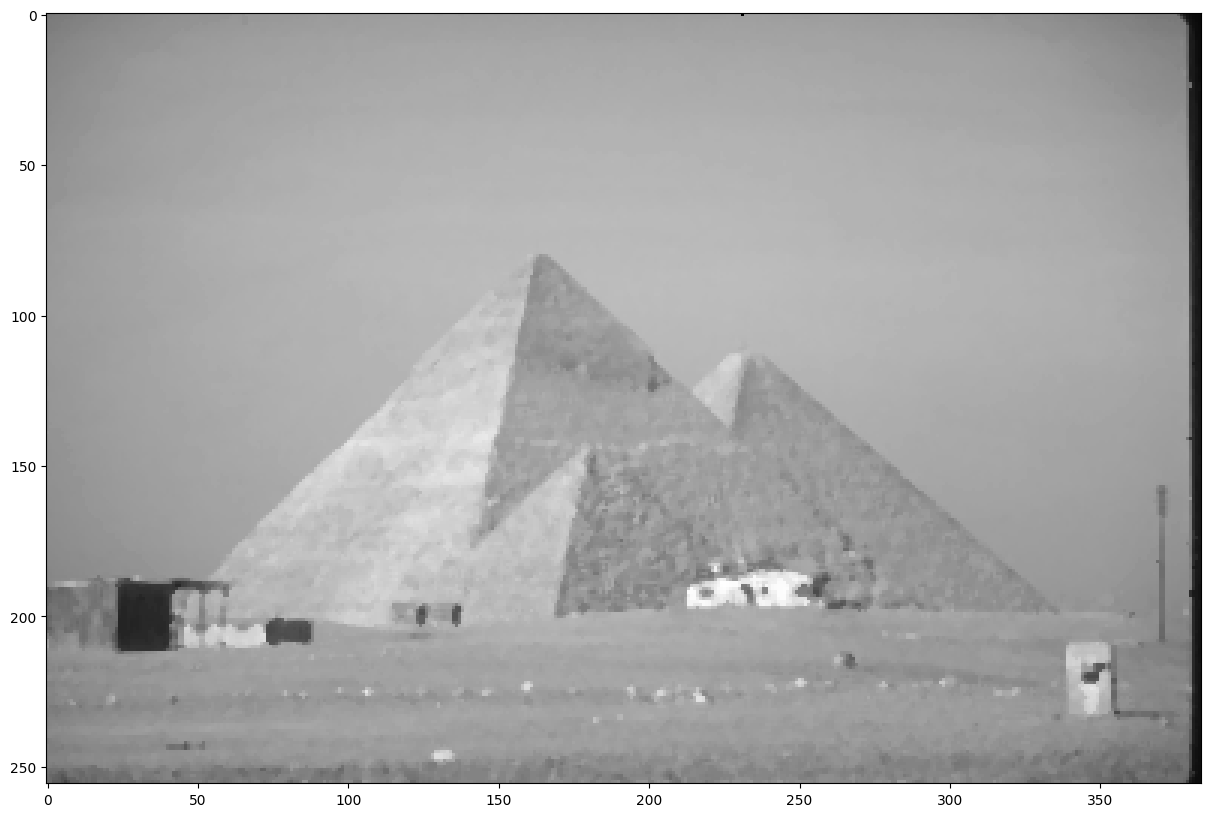

In [11]:
plt.figure(figsize=(20,10))
im_median_filtered = median(im)
plt.imshow(im_median_filtered, cmap='gray')